In [1]:
from nba_api.stats.static import players, teams
from nba_api.stats.endpoints import(
    playercareerstats,
    leagueleaders,
    leaguedashteamstats,
    shotchartdetail
)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle, Rectangle, Arc

print("Libraries imported")

Libraries imported


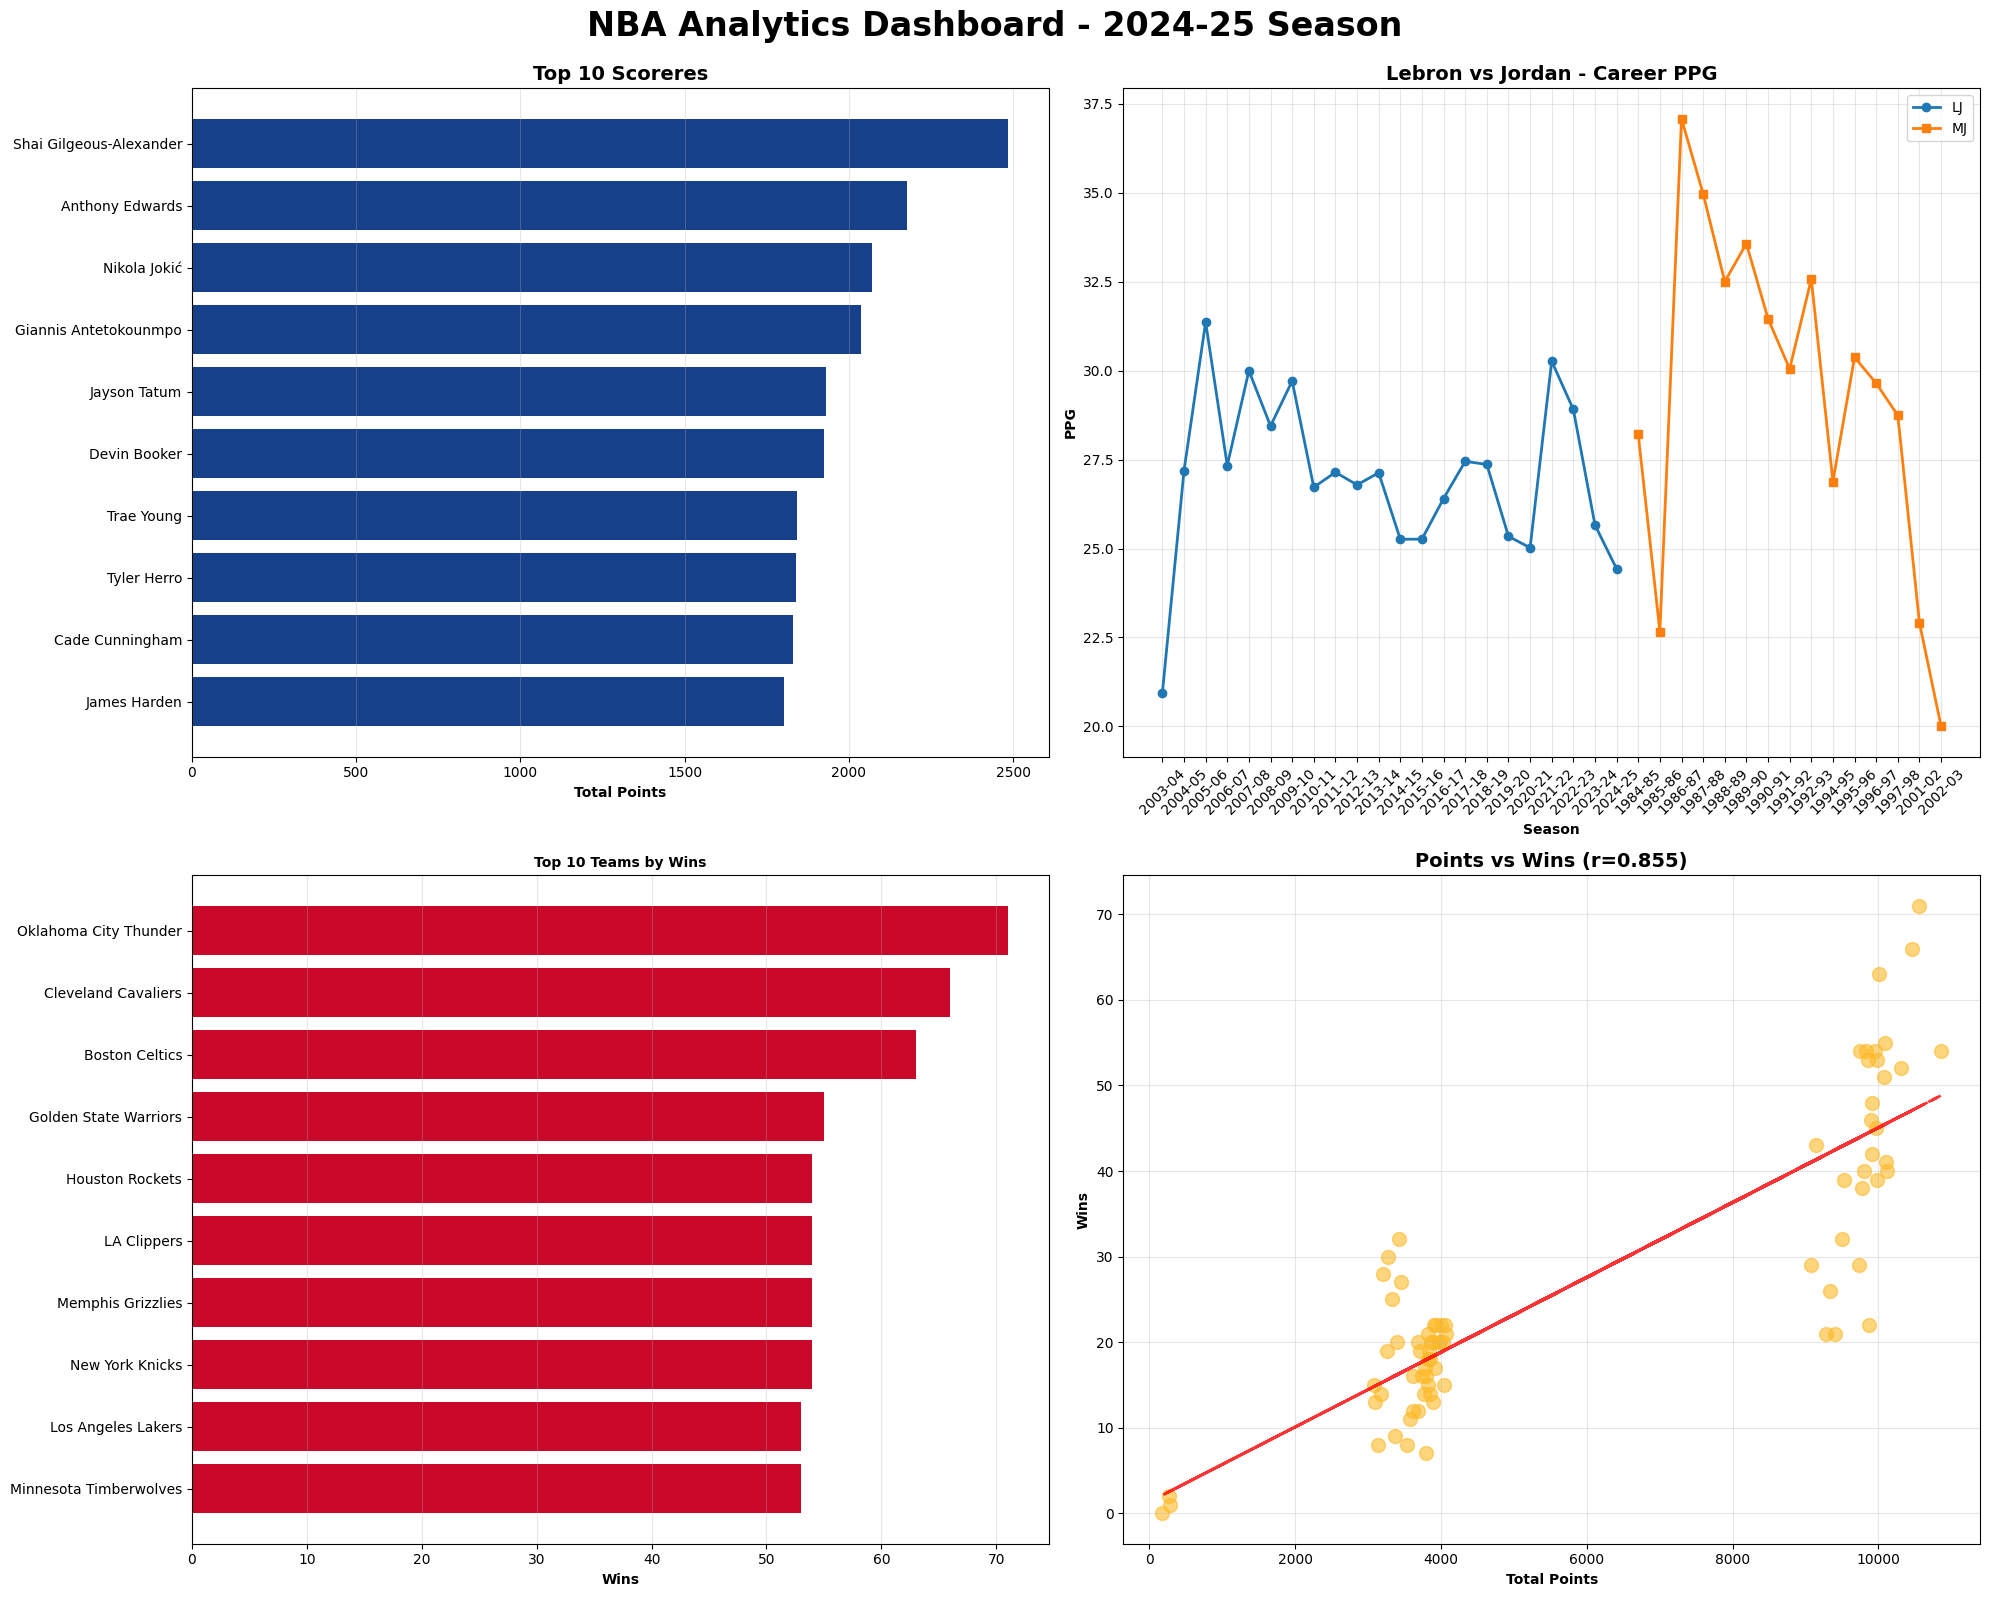

In [7]:
# fig template
fig = plt.figure(figsize = (20,16))

# subplots
ax1 = plt.subplot(2,2,1) # top left
ax2 = plt.subplot(2,2,2) # top right
ax3 = plt.subplot(2,2,3) # bottom left
ax4 = plt.subplot(2,2,4) # bottom right

plt.suptitle('NBA Analytics Dashboard - 2024-25 Season',
             fontsize = 24, fontweight = 'bold', y = 0.995)

# top scorers ax1
leaders = leagueleaders.LeagueLeaders(season = '2024-25', stat_category_abbreviation = 'PTS')
leaders_df = leaders.get_data_frames()[0]
top_10 = leaders_df.head(10)

ax1.barh(top_10['PLAYER'], top_10['PTS'], color = '#17408B')
ax1.set_xlabel('Total Points', fontsize = 10, fontweight = 'bold')
ax1.set_title('Top 10 Scoreres', fontsize = 14, fontweight = 'bold')
ax1.invert_yaxis()
ax1.grid(axis = 'x', alpha = 0.3)

# player comparison ax2
p1 = players.find_players_by_full_name('Lebron James')[0]
p2 = players.find_players_by_full_name('Michael Jordan')[0]

p1_stats = playercareerstats.PlayerCareerStats(player_id = p1['id']).get_data_frames()[0]
p2_stats = playercareerstats.PlayerCareerStats(player_id = p2['id']).get_data_frames()[0]

p1_stats['PPG'] = p1_stats['PTS'] / p1_stats['GP']
p2_stats['PPG'] = p2_stats['PTS'] / p2_stats['GP']

ax2.plot(p1_stats['SEASON_ID'], p1_stats['PPG'], marker = 'o', label = 'LJ', linewidth = 2)
ax2.plot(p2_stats['SEASON_ID'], p2_stats['PPG'], marker = 's', label = 'MJ', linewidth = 2)
ax2.set_xlabel('Season', fontsize = 10, fontweight= 'bold')
ax2.set_ylabel('PPG', fontsize = '10', fontweight = 'bold')
ax2.set_title('Lebron vs Jordan - Career PPG', fontsize = 14, fontweight = 'bold')
ax2.legend()
ax2.grid(alpha= 0.3)
ax2.tick_params(axis = 'x', rotation = 45)

# team wins ax3
team_stats = leaguedashteamstats.LeagueDashTeamStats(season = '2024-25')
teams_df = team_stats.get_data_frames()[0]
top_teams = teams_df.nlargest(10, 'W')

ax3.barh(top_teams['TEAM_NAME'], top_teams['W'], color = '#c9082A')
ax3.set_xlabel('Wins', fontsize = 10, fontweight = 'bold')
ax3.set_title('Top 10 Teams by Wins', fontsize = 10, fontweight = 'bold')
ax3.invert_yaxis()
ax3.grid(axis = 'x', alpha = 0.3)

# correlation ax4
correlation = teams_df['PTS'].corr(teams_df['W'])

ax4.scatter(teams_df['PTS'], teams_df['W'], alpha = 0.6, s = 100, color = '#FDB927')
z = np.polyfit(teams_df['PTS'], teams_df['W'], 1)
p = np.poly1d(z)
ax4.plot(teams_df['PTS'], p(teams_df['PTS']), "r--", alpha = 0.8, linewidth = 2)
ax4.set_xlabel('Total Points', fontsize = 10, fontweight = 'bold')
ax4.set_ylabel('Wins', fontsize = 10, fontweight = 'bold')
ax4.set_title(f'Points vs Wins (r={correlation:.3f})', fontsize = 14, fontweight = 'bold')
ax4.grid(alpha = 0.3)

plt.tight_layout()
plt.savefig('../visualizations/dashboard_week1.png', dpi = 300, bbox_inches = 'tight')
plt.show()